<a href="https://colab.research.google.com/github/burapauq/burapa-chiwpreecha/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Bank_Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bank Churn Prediction Project



In [ ]:
# import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

1) อ่านชุดข้อ มูลจาก URL

In [ ]:
import pandas as pd

URL = 'https://raw.githubusercontent.com/burapauq/DataSci/main/train.csv'
df = pd.read_csv(URL)

2) การสํารวจข้อมูล (Data Understanding)

In [ ]:
df.shape

(165034, 14)

In [ ]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
# ดูเฉพาะแถวที่ซ้ำกันใน DataFrame
df[df.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c6145e0ccb65b8e9557afba2f40cc19235bb14e625bc8660430ba7ccb3ee8f82
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='y-data profiling report', explorative=True)

In [ ]:
profile.to_file("y-data profiling report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:06<00:00,  2.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Encoding categorical features
# To convert categorical features to such integer codes, we can use
# the  OrdinalEncoder. This estimator transforms each categorical feature
# to one new feature of integers (0 to n_categories - 1):

from sklearn.preprocessing import OrdinalEncoder # Function ที่ใช้เปลี่ยน object เป็นตัวเลข 1, 2, 3, ...
enc = OrdinalEncoder()
enc.fit(df[['Geography','Gender']])
df[['Geography','Gender']] = enc.transform(df[['Geography','Gender']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  float64
 5   Gender           165034 non-null  float64
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 17.6+ MB


In [ ]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0.0,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0.0,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0.0,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0.0,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2.0,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,2.0,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,0.0,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,0.0,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,2.0,0.0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
# คำสั่ง df.describe() ใน Pandas ใช้เพื่อสรุปสถิติเชิงพรรณนา (descriptive statistics) ของข้อมูลเชิงตัวเลข (numerical columns)
df.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.shape

(165034, 14)

3) การประมวลผลข้อมูล

In [ ]:
X = df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1) # ลบคอลัมที่ไม่จำเป็นในการใช้สร้างโมเดล
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0.0,1.0,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0.0,1.0,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0.0,1.0,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0.0,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2.0,1.0,33.0,5,0.00,2,1.0,1.0,15068.83


In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0.0,1.0,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0.0,1.0,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0.0,1.0,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0.0,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2.0,1.0,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,2.0,0.0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,0.0,1.0,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,0.0,1.0,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,2.0,0.0,30.0,7,161533.00,1,0.0,1.0,71173.03


In [ ]:
y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [ ]:
y

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
165029,0
165030,0
165031,0
165032,0


In [ ]:
# Check if data are balanced

from collections import Counter
print(sorted(Counter(y).items()))

[(0, 130113), (1, 34921)]


In [ ]:
!pip install imbalanced-learn

In [ ]:
# Imbalanced-learn (imported as imblearn ) is an open source,
# MIT-licensed library relying on scikit-learn (imported as sklearn )
# and provides tools when dealing with classification with imbalanced classes
# http://glemaitre.github.io/imbalanced-learn/index.html
# Combine methods mixed over- and under-sampling methods.
# conda install -c glemaitre imbalanced-learn
# conda install -c conda-forge/label/cf202003 imbalanced-learn

from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X, y = sm.fit_resample(X, y)

In [ ]:
# Check again  if data are balanced
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 118807), (1, 118807)]


In [ ]:
# Split dataset into training set and test set 70% training and 30% test (แบ่งข้อมูลเป็น train and test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # random test ใส่อะไรก้ได้ แต่ต้องเหมือนเดิมทุกครั้ง

In [ ]:
# Standardization, or mean removal and variance scaling
# Standardization of datasets is a common requirement for many machine learning
# estimators implemented in scikit-learn; they might behave badly if the
# individual features do not more or less look like standard normally distributed data:
# Gaussian with zero mean and unit variance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.52558323, -0.89832066, -1.08945214, ..., -1.84505406,
        -0.90302038,  1.30977292],
       [ 0.51157975,  0.55155747,  1.04010026, ...,  0.61919437,
        -0.90302038, -1.68414455],
       [ 0.78581323, -0.89832066,  1.04010026, ...,  0.61919437,
        -0.90302038,  0.75318914],
       ...,
       [ 0.36793364, -0.89832066,  1.04010026, ...,  0.61919437,
        -0.90302038,  0.20301443],
       [-0.72900027,  1.76189277,  1.04010026, ..., -1.84505406,
        -0.90302038,  1.24941844],
       [-1.01629249,  1.76189277,  1.04010026, ...,  0.61919437,
        -0.90302038,  1.14348612]])

In [ ]:
X_test

array([[ 1.02087049, -0.89832066,  0.92480509, ..., -1.71163825,
        -0.78730141, -1.10872462],
       [-1.35581965,  0.43178605, -0.68974232, ...,  0.61919437,
        -0.5018413 ,  1.27749436],
       [ 0.26346374, -0.89832066, -1.08945214, ...,  0.61919437,
        -0.1160624 ,  1.41674886],
       ...,
       [-1.44723081, -0.89832066, -1.08945214, ..., -1.84505406,
         1.23435984,  1.38712605],
       [-1.00323375, -0.89832066, -1.08945214, ...,  0.61919437,
         1.23435984, -1.23955914],
       [-0.82041143,  0.43178605, -1.08945214, ...,  0.61919437,
         1.23435984,  0.78554114]])

4) การสร้างและประเมินโมเดล

1. Naive Bayes : Gaussian Naive Bayes (GaussianNB)

In [ ]:
# Gaussian Naive Bayes (GaussianNB)

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.naive_bayes import GaussianNB

# 2. Choose model hyperparameters by instantiating this class with desired values.
GaussianNB_model = GaussianNB()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets

GaussianNB_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test dataset

y_pred = GaussianNB_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Gaussian Naive Bayes model :",  metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Gaussian Naive Bayes model : 0.8039980360524654
[[28317  7322]
 [ 6650 28996]]


2. Naive Bayes : Bernoulli Naive Bayes

In [ ]:
#  Bernoulli Naive Bayes

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.naive_bayes import BernoulliNB

# 2. Choose model hyperparameters by instantiating this class with desired values.
BernoulliNB_model = BernoulliNB()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
BernoulliNB_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred = BernoulliNB_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Bernoulli Naive Bayes model :",metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Bernoulli Naive Bayes model : 0.7839236866100863
[[27383  8256]
 [ 7147 28499]]


3. Neural network models (supervised) : Classification

In [ ]:
# Neural network models (supervised)

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.neural_network import MLPClassifier

# 2. Choose model hyperparameters by instantiating this class with desired values.
MLPClassifier_model = MLPClassifier(random_state=1, max_iter=1000)

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets

MLPClassifier_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test dataset

y_pred = MLPClassifier_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Neural network model :" ,metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Neural network model : 0.8970049800098198
[[32794  2845]
 [ 4497 31149]]


4. Ensembles : Random Forests

In [ ]:
# RandomForestClassifier

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.ensemble import RandomForestClassifier

# 2. Choose model hyperparameters by instantiating this class with desired values.
# การใส่ต้องอ่านบทความ
RandomForestClassifier_model = RandomForestClassifier()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets

RandomForestClassifier_model.fit(X_train, y_train)

# 5. Apply the model to new data: Predict the response for test dataset

y_pred = RandomForestClassifier_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Random Forest model :",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Random Forest model : 0.91027565406467
[[33298  2341]
 [ 4055 31591]]


5. Decision Trees : Classification

In [ ]:
# Decision Trees

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn import tree

# 2. Choose model hyperparameters by instantiating this class with desired values.
tree_model = tree.DecisionTreeClassifier(random_state=0)

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
tree_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred = tree_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Decision Trees model : ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Decision Trees model :  0.8709125341937294
[[30902  4737]
 [ 4465 31181]]


6. Nearest Neighbors : Nearest Neighbors Classification

In [ ]:
# Nearest Neighbors Classification

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.neighbors import KNeighborsClassifier

# 2. Choose model hyperparameters by instantiating this class with desired values.
KNeighborsClassifier_model = KNeighborsClassifier()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
KNeighborsClassifier_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred =KNeighborsClassifier_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Nearest Neighbors Classification :", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Nearest Neighbors Classification : 0.8556217998176334
[[30932  4707]
 [ 5585 30061]]


7. Stochastic Gradient Descent : Classification

In [ ]:
# Stochastic Gradient Descent

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.linear_model import SGDClassifier

# 2. Choose model hyperparameters by instantiating this class with desired values.
SGDClassifier_model = SGDClassifier()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
SGDClassifier_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred =SGDClassifier_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Stochastic Gradient Descen model :",metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Stochastic Gradient Descen model : 0.7914848846180823
[[27669  7970]
 [ 6894 28752]]


8. Support vector machines (SVMs) : Classification

In [ ]:
# SVMs

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# 2. Choose model hyperparameters by instantiating this class with desired values.
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
svm_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred =svm_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Support vector machines (SVMs) model :",metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Support vector machines (SVMs) model : 0.8869327347969419
[[32683  2956]
 [ 5104 30542]]


9. Linear Discriminant Analysis


In [ ]:
# Linear Discriminant Analysis

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 2. Choose model hyperparameters by instantiating this class with desired values.
LDA_model = LinearDiscriminantAnalysis()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
LDA_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred = LDA_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Linear Discriminant Analysis model :",metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Linear Discriminant Analysis model : 0.7906151364242127
[[27488  8151]
 [ 6775 28871]]


10. Quadratic Discriminant Analysis

In [ ]:
# Quadratic Discriminant Analysis

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 2. Choose model hyperparameters by instantiating this class with desired values.
QDA_model =QuadraticDiscriminantAnalysis()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
QDA_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred = QDA_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of Quadratic Discriminant Analysis model :",metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of Quadratic Discriminant Analysis model : 0.8180823455144841
[[28582  7057]
 [ 5911 29735]]


11. Linear Models : Ridge regression and classification

In [ ]:
# Ridge regression and classification

# 1. Choose a class of model by importing the appropriate estimator class
# from Scikit-Learn.

from sklearn.linear_model import RidgeClassifier

# 2. Choose model hyperparameters by instantiating this class with desired values.
RidgeClassifier_model = RidgeClassifier()

# 4. Fit the model to your data by calling the fit() method of the model instance.
#Train the model using the training sets
RidgeClassifier_model.fit(X_train, y_train) # เทรนโมเดล

# 5. Apply the model to new data: Predict the response for test datase

y_pred =RidgeClassifier_model.predict(X_test)

#Evaluating Model for classification

from sklearn import metrics
print("Accuracy of RidgeClassifier model :",metrics.accuracy_score(y_test, y_pred)) # เช็คความแม่นยำ

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of RidgeClassifier model : 0.7906151364242127
[[27488  8151]
 [ 6775 28871]]


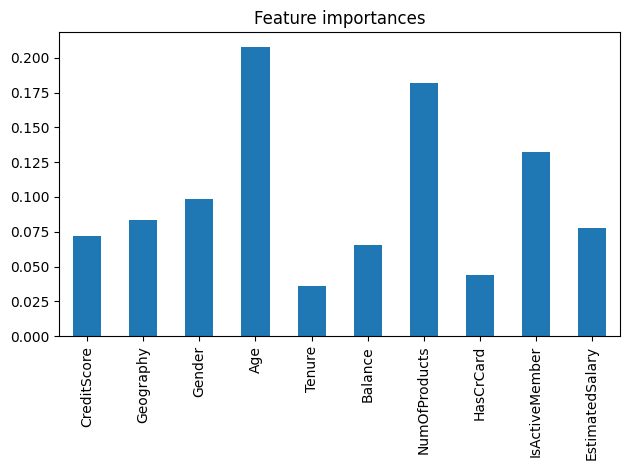

In [ ]:
#Feature importance based on mean decrease in impurity

feature_names = list(X.columns)
importances = RandomForestClassifier_model.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

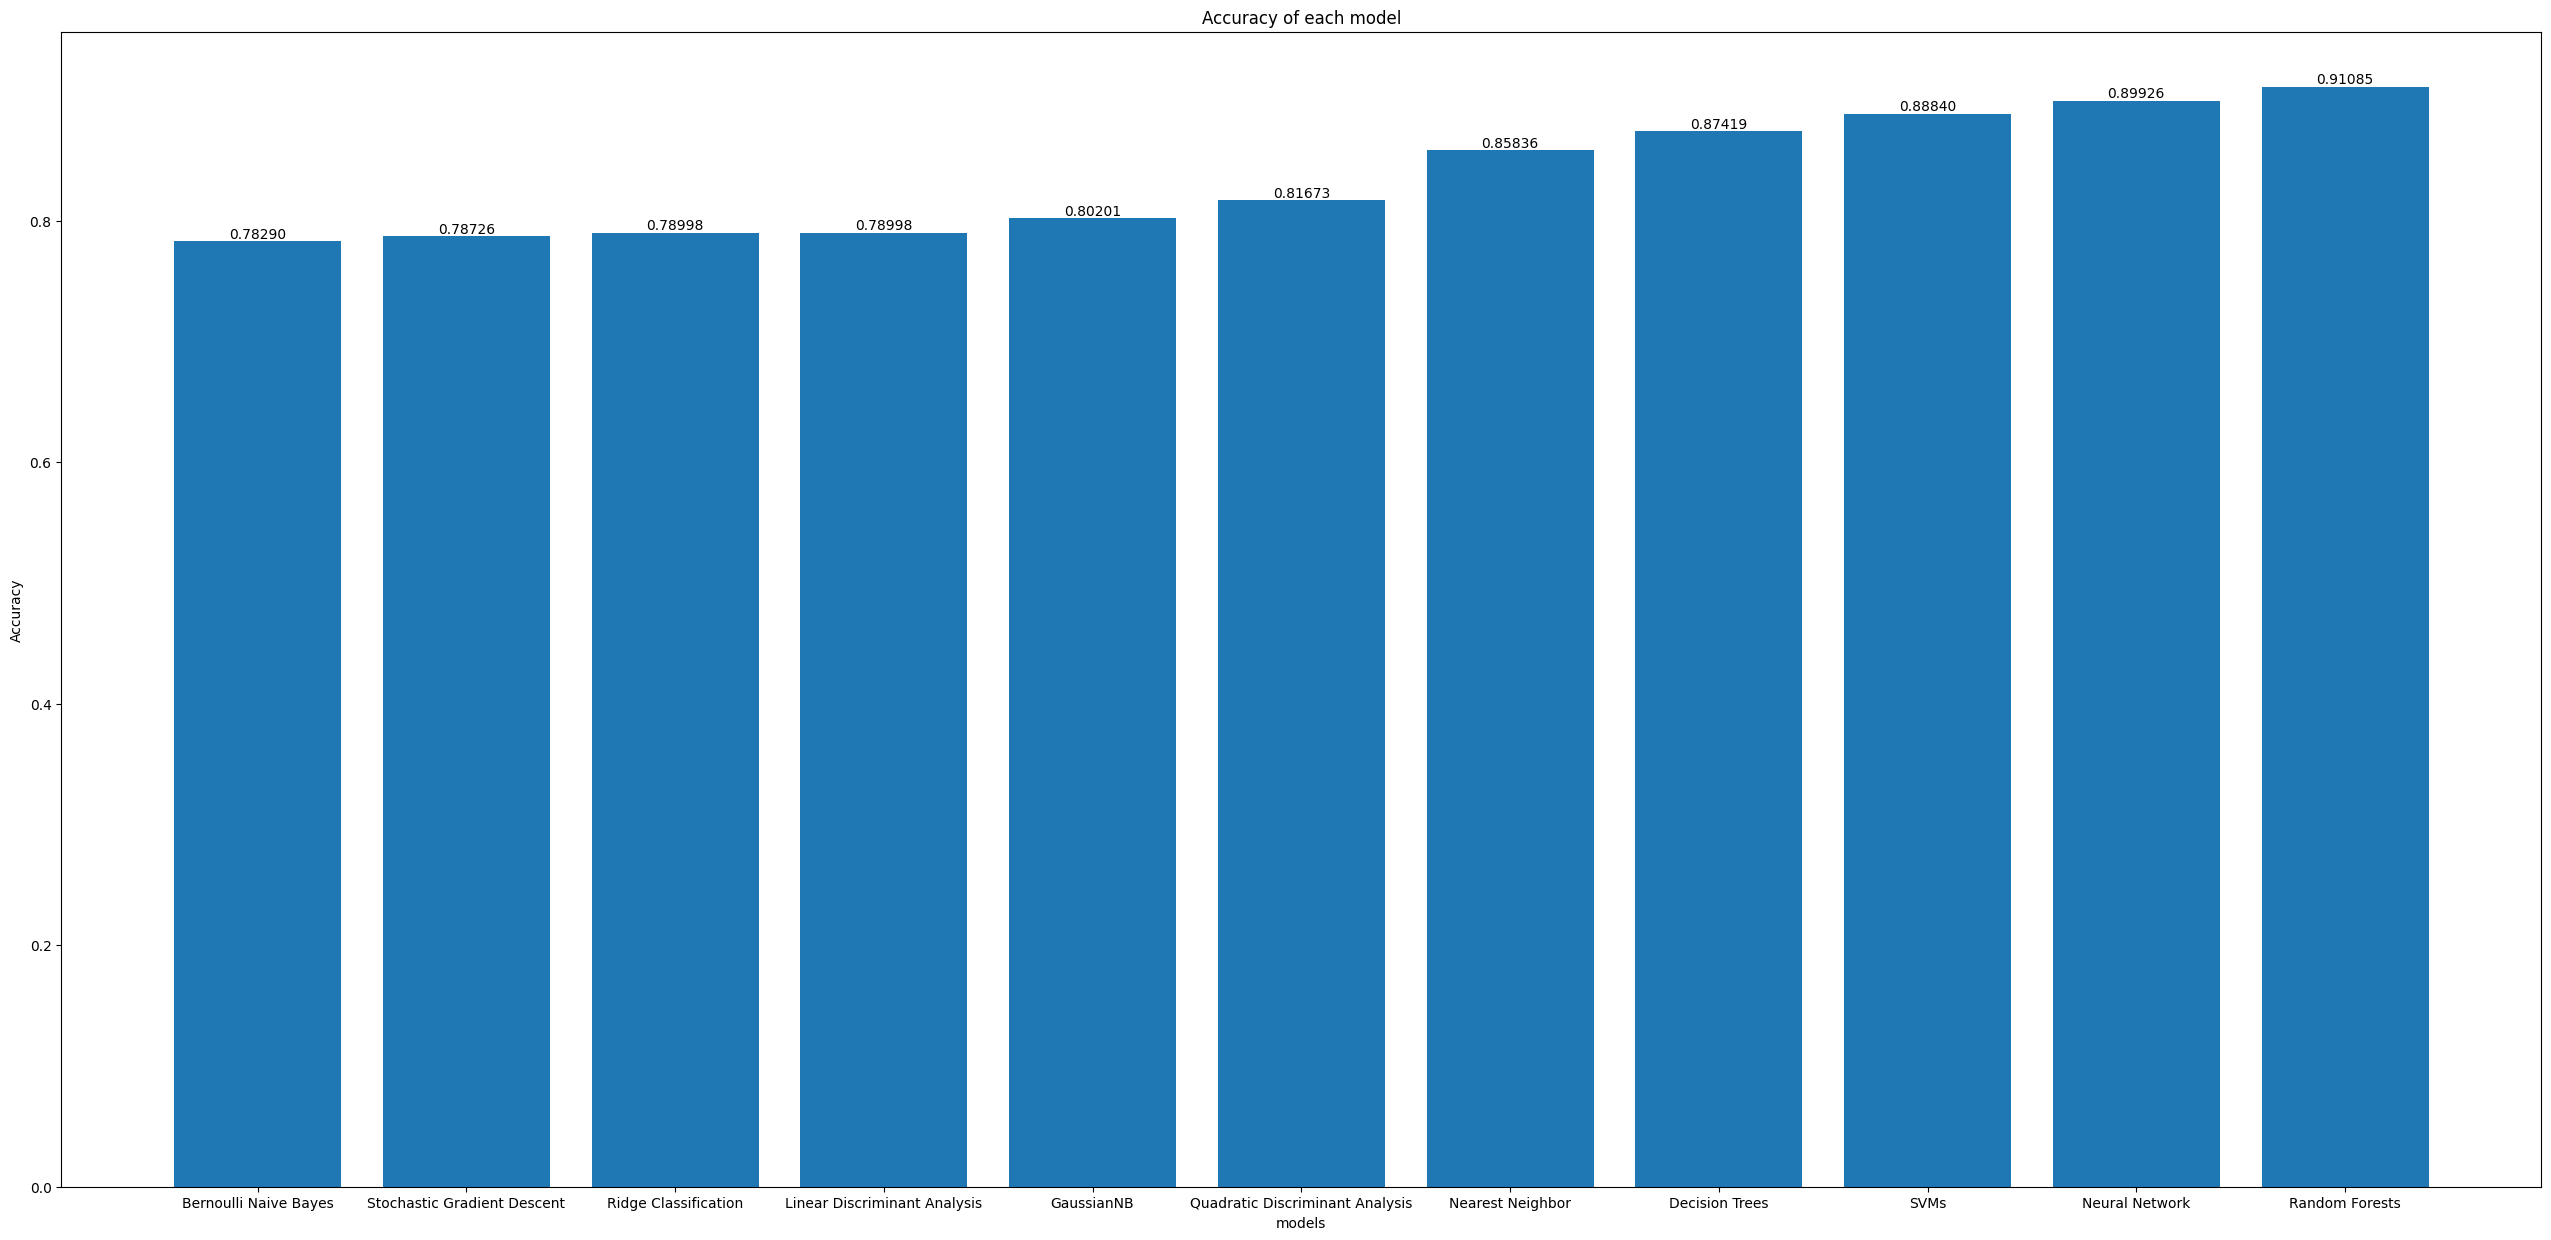

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# สร้าง DataFrame เป็นค่าที่แคปใส่สไลด์ เพื่อไม่ให้ค่าเพี้ยน
data = {'Categories': ['GaussianNB', 'Random Forests', 'Neural Network', 'Decision Trees', 'Nearest Neighbor', 'Stochastic Gradient Descent', 'SVMs', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Bernoulli Naive Bayes', 'Ridge Classification'],
            'Values' : [0.8020125750856116, 0.9108516252175377, 0.8992589681693145,  0.8741930051086285, 0.8583618705439847, 0.7872621119407175, 0.8883961151967664, 0.789984842530736, 0.8167349688429798, 0.7828973221804301,  0.789984842530736]}
df = pd.DataFrame(data)

# เรียงข้อมูลจากน้อยไปมาก
df_sorted = df.sort_values('Values')

# กำหนดขนาดของกราฟ
plt.figure(figsize=(32, 15))  # กำหนดความกว้างเป็น 10 และความสูงเป็น 6


# พล็อตกราฟแท่ง
plt.bar(df_sorted['Categories'], df_sorted['Values'])


# เพิ่มชื่อกราฟ
plt.title('Accuracy of each model')

# เพิ่มชื่อแกน x และ y
plt.xlabel('models')
plt.ylabel('Accuracy')

# แสดงตัวเลขที่แสดงบนแกน y เป็นทศนิยม 3 ตำแหน่ง
for i, value in enumerate(df_sorted['Values']):
    plt.text(i, value, '{:.5f}'.format(value), ha='center', va='bottom')

# แสดงกราฟ
plt.show()

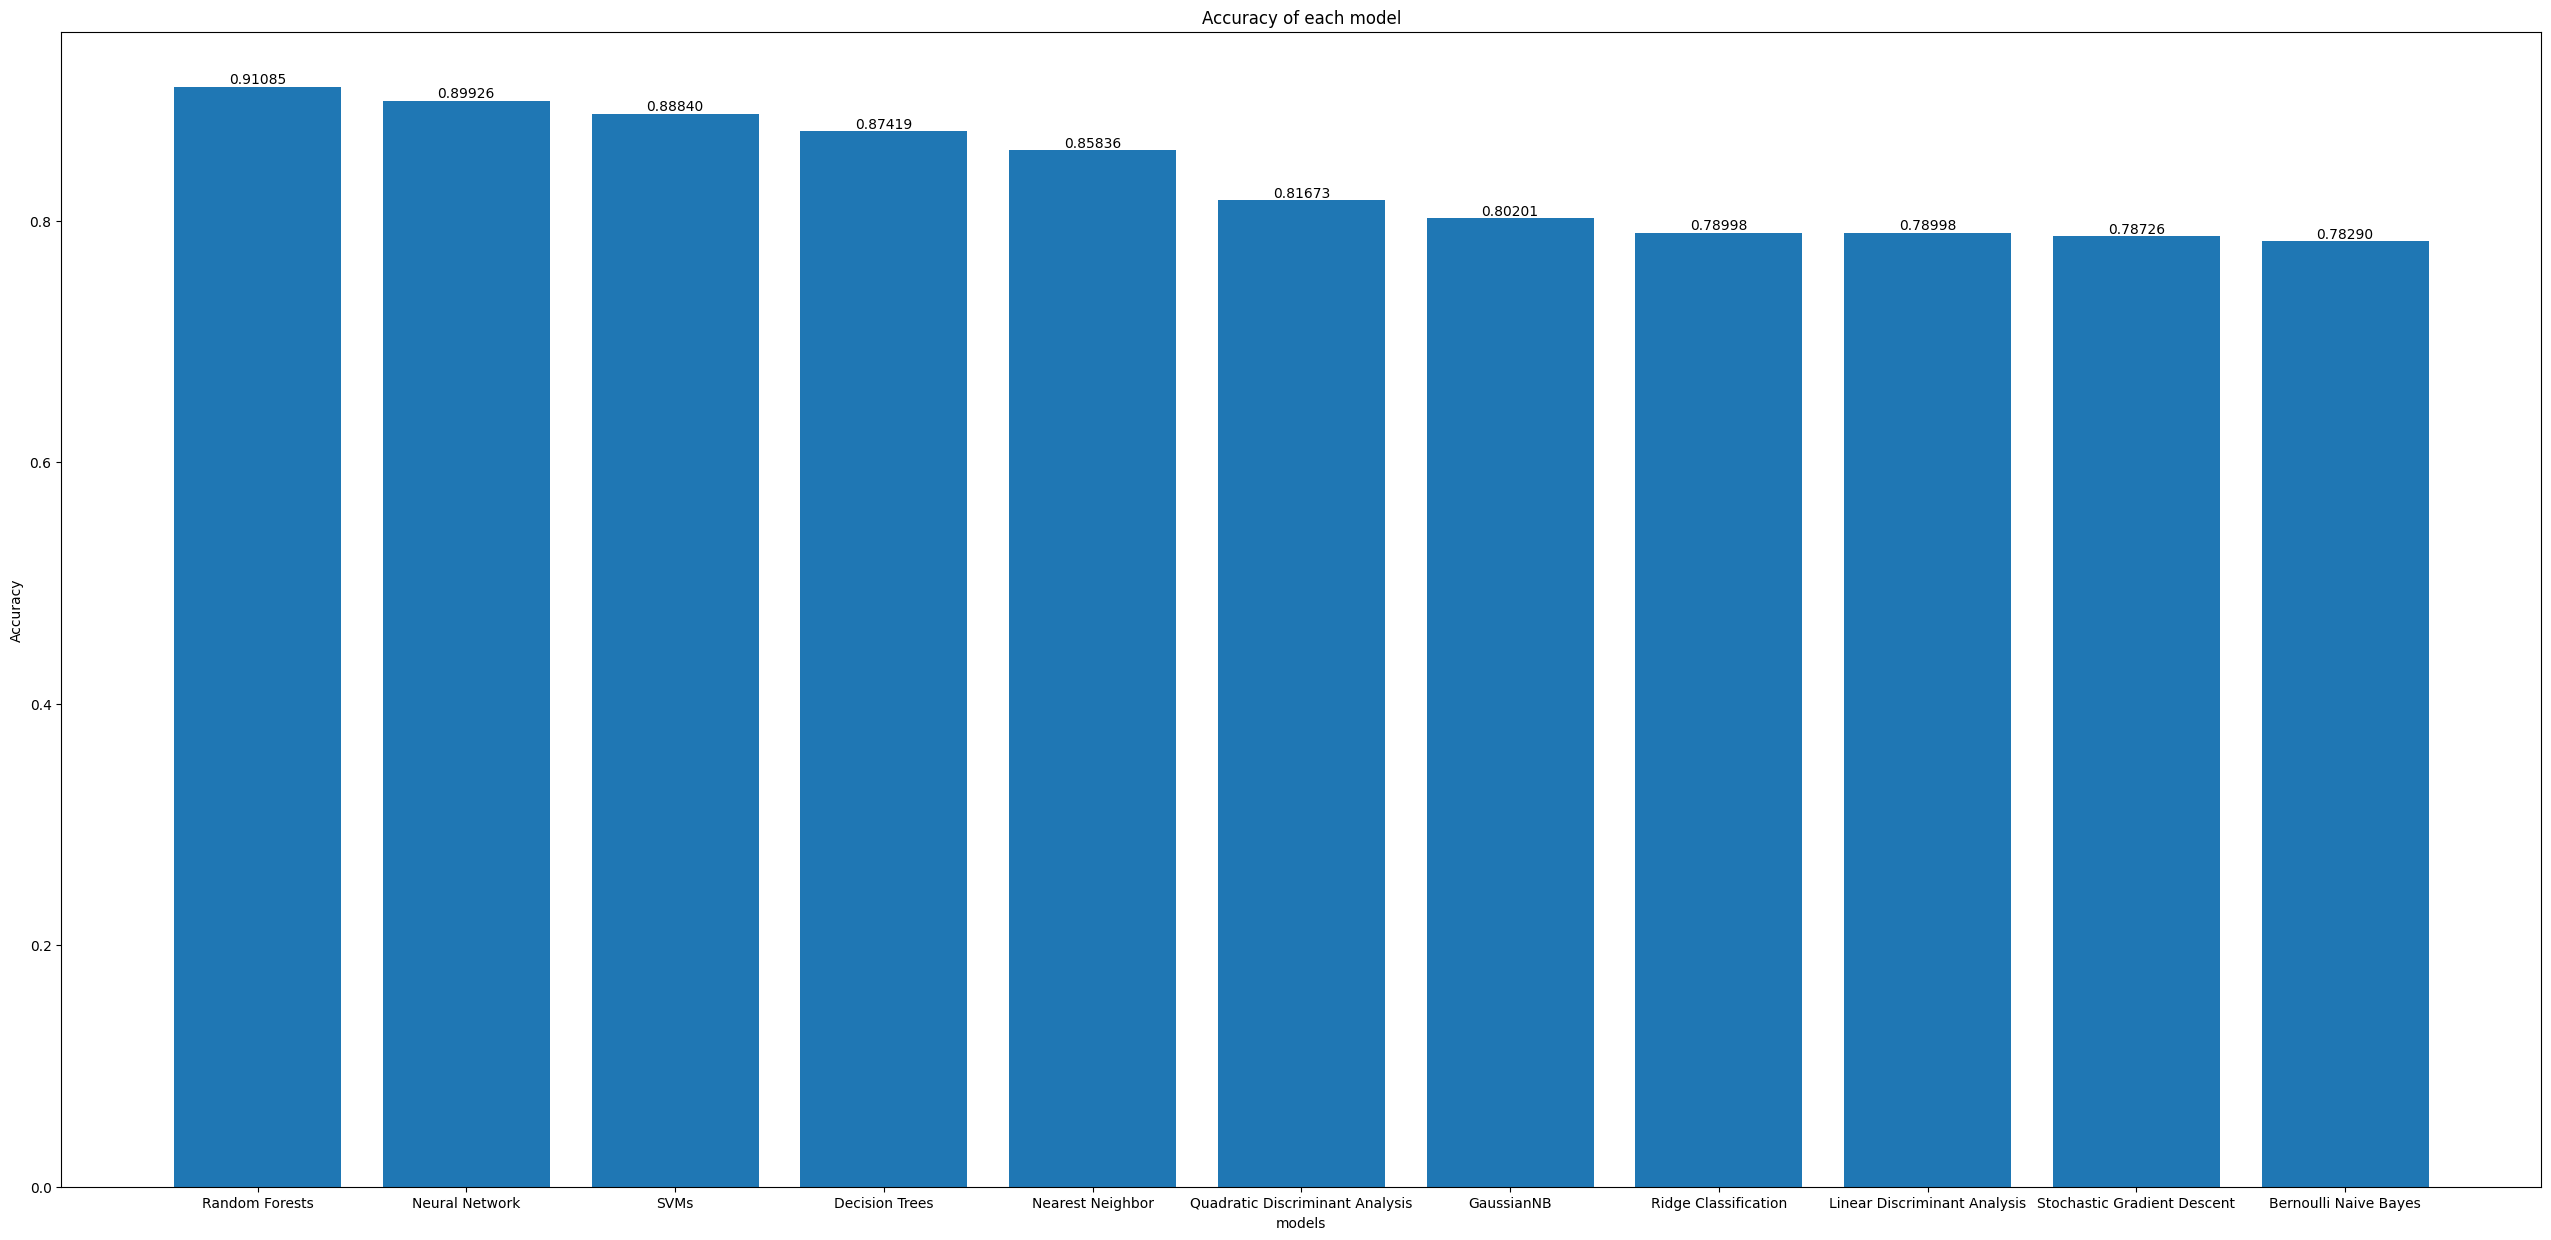

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# สร้าง DataFrame เป็นค่าที่แคปใส่สไลด์ เพื่อไม่ให้ค่าเพี้ยน
data = {'Categories': ['GaussianNB', 'Random Forests', 'Neural Network', 'Decision Trees', 'Nearest Neighbor', 'Stochastic Gradient Descent', 'SVMs', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Bernoulli Naive Bayes', 'Ridge Classification'],
            'Values' : [0.8020125750856116, 0.9108516252175377, 0.8992589681693145,  0.8741930051086285, 0.8583618705439847, 0.7872621119407175, 0.8883961151967664, 0.789984842530736, 0.8167349688429798, 0.7828973221804301,  0.789984842530736]}
df = pd.DataFrame(data)

# เรียงข้อมูลจากน้อยไปมาก
df_sorted = df.sort_values('Values', ascending=False)

# กำหนดขนาดของกราฟ
plt.figure(figsize=(32, 15))  # กำหนดความกว้างเป็น 10 และความสูงเป็น 6


# พล็อตกราฟแท่ง
plt.bar(df_sorted['Categories'], df_sorted['Values'])


# เพิ่มชื่อกราฟ
plt.title('Accuracy of each model')

# เพิ่มชื่อแกน x และ y
plt.xlabel('models')
plt.ylabel('Accuracy')

# แสดงตัวเลขที่แสดงบนแกน y เป็นทศนิยม 3 ตำแหน่ง
for i, value in enumerate(df_sorted['Values']):
    plt.text(i, value, '{:.5f}'.format(value), ha='center', va='bottom')

# แสดงกราฟ
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

In [ ]:
URL = 'https://raw.githubusercontent.com/burapauq/DataSci/main/train.csv'
df = pd.read_csv(URL)

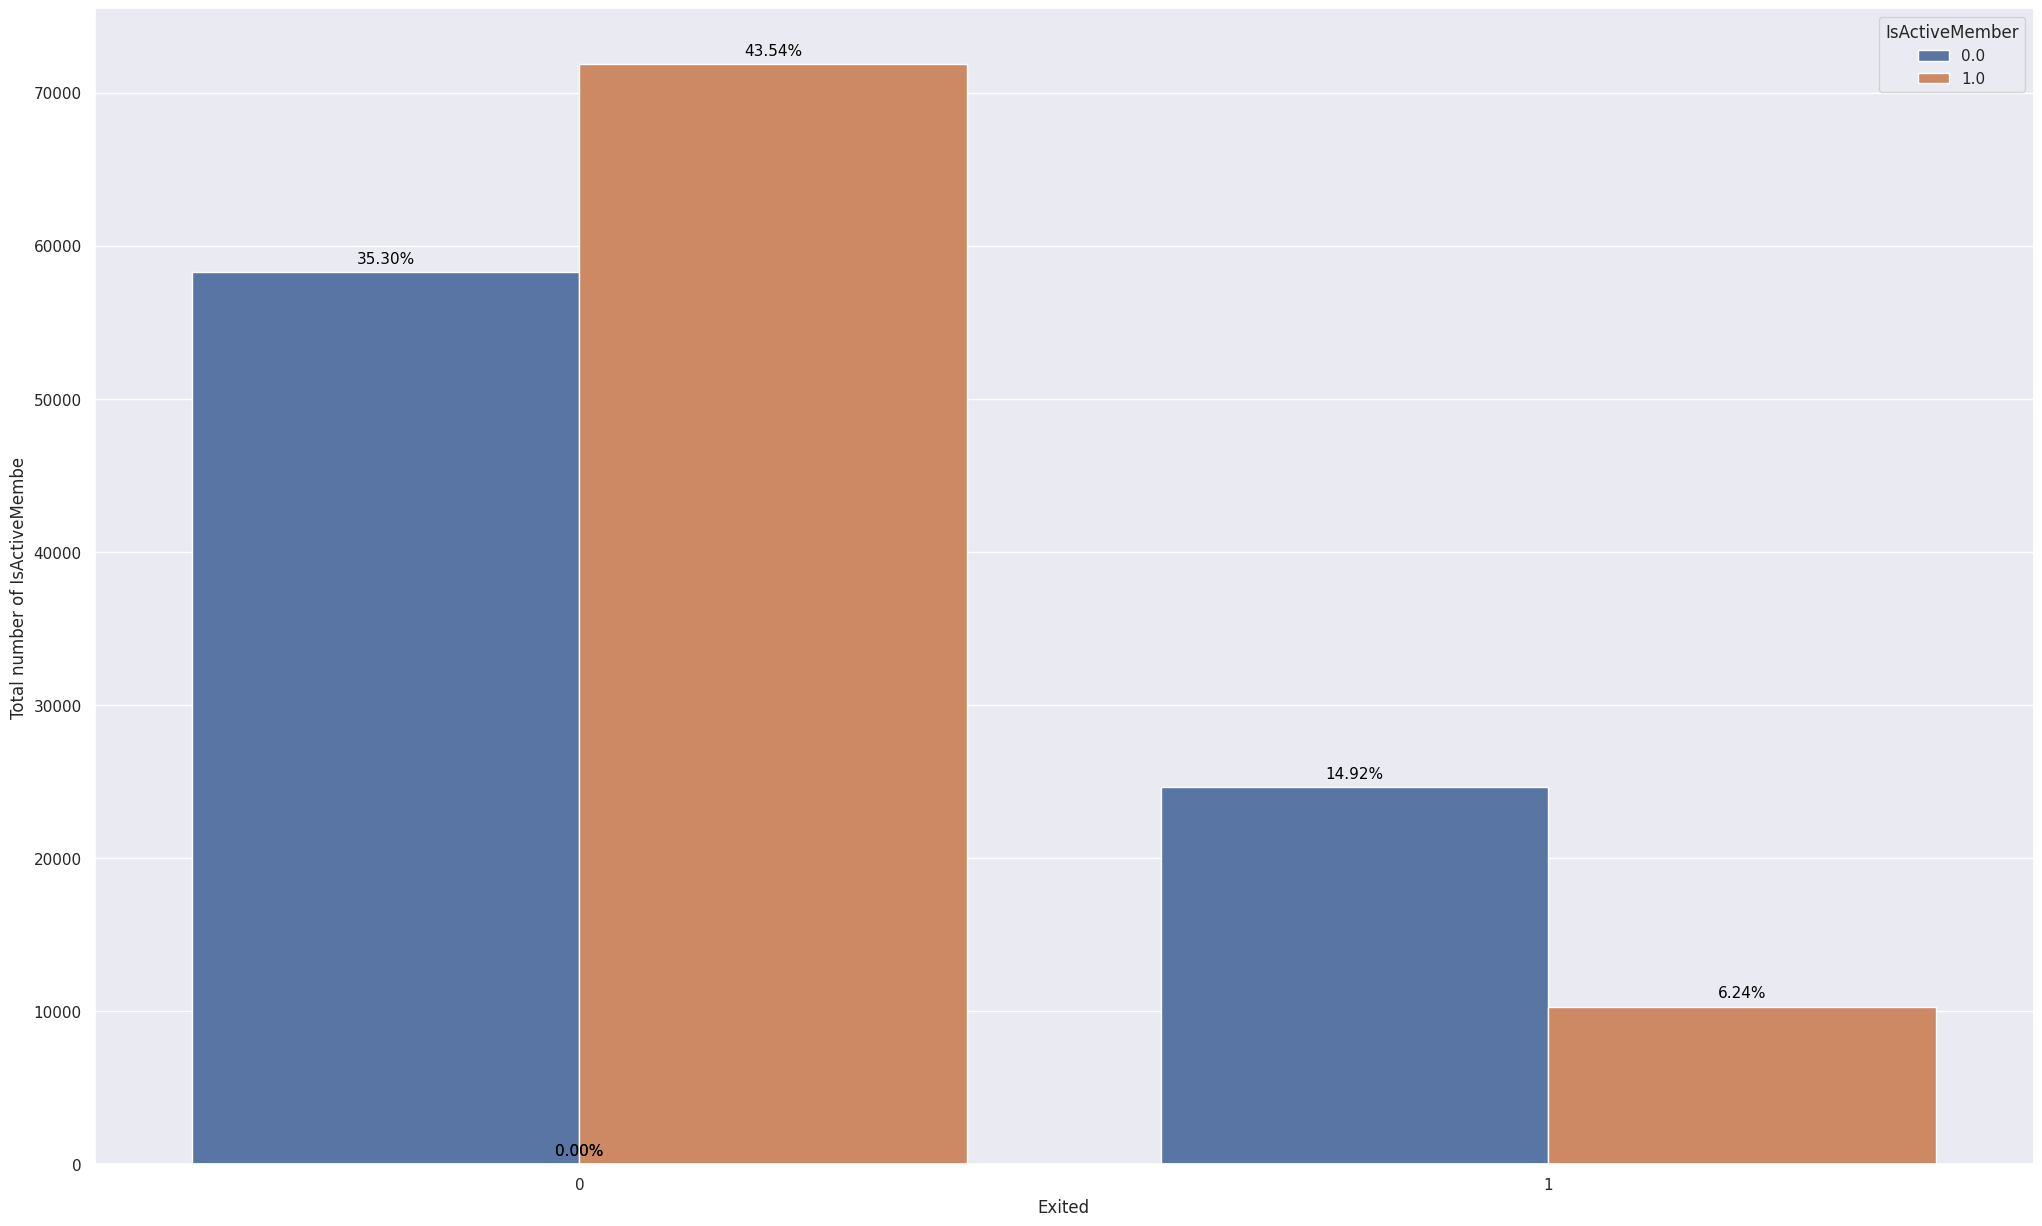

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x='Exited',hue = 'IsActiveMember' ,data = df)
plt.ylabel('Total number of IsActiveMembe')
annot_plot(ax, 0.08,1)
plt.show()

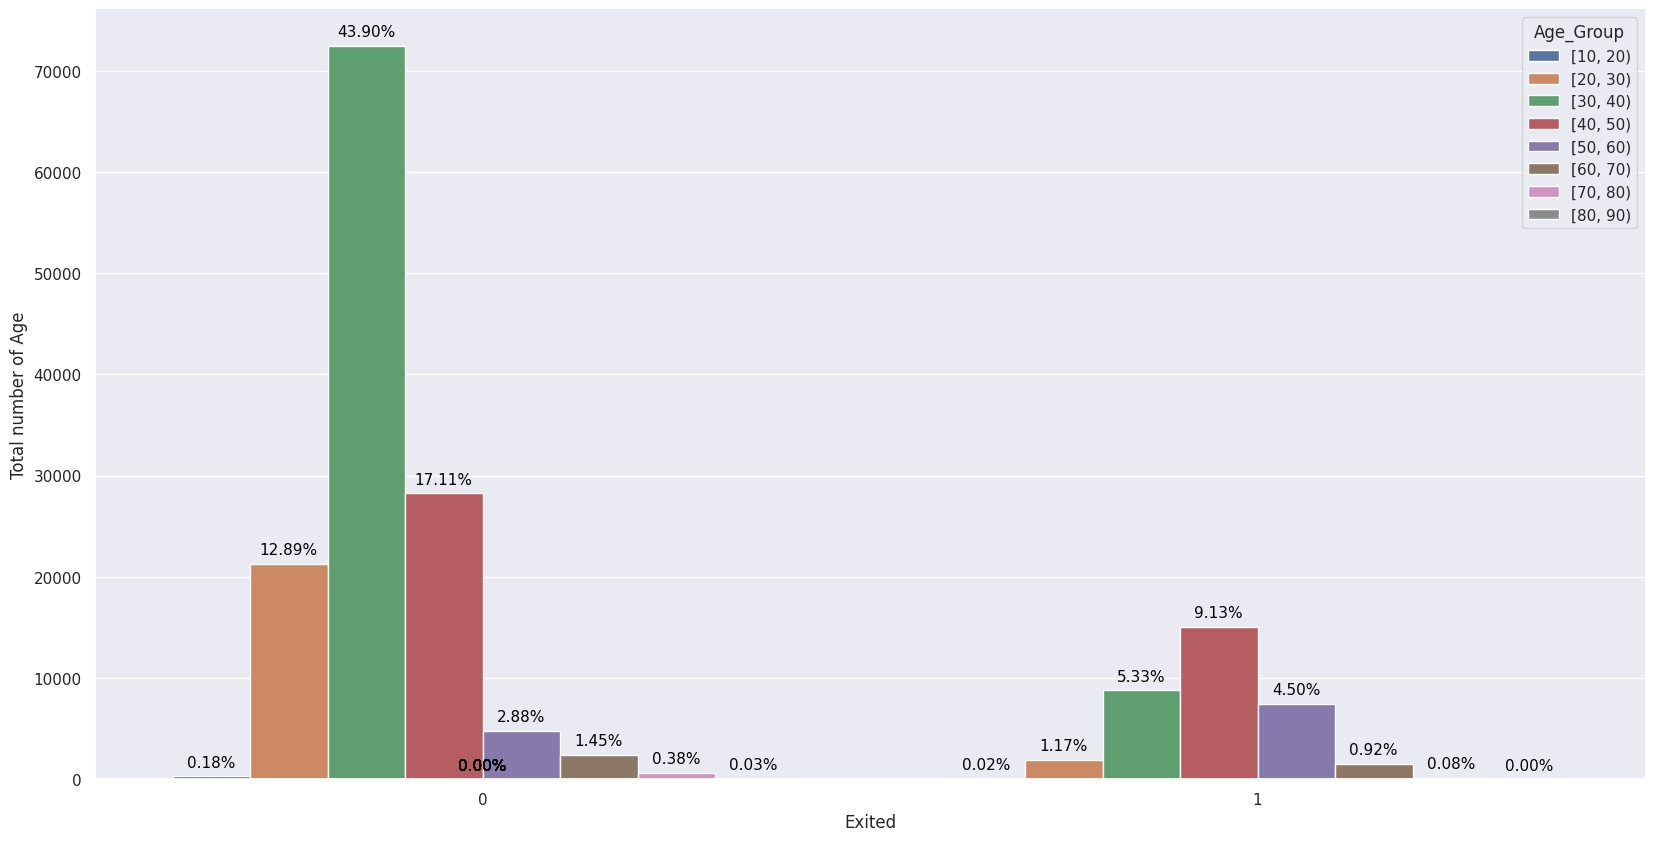

In [ ]:
plt.figure(figsize=(20,10))
# แบ่งช่วงอายุที่ละ 10 ปี
df['Age_Group'] = pd.cut(df['Age'], bins=range(10, 100, 10), right=False)
ax = sns.countplot(data=df, x="Exited", hue="Age_Group")
plt.ylabel('Total number of Age')
annot_plot(ax, 0.010,1)
plt.show()

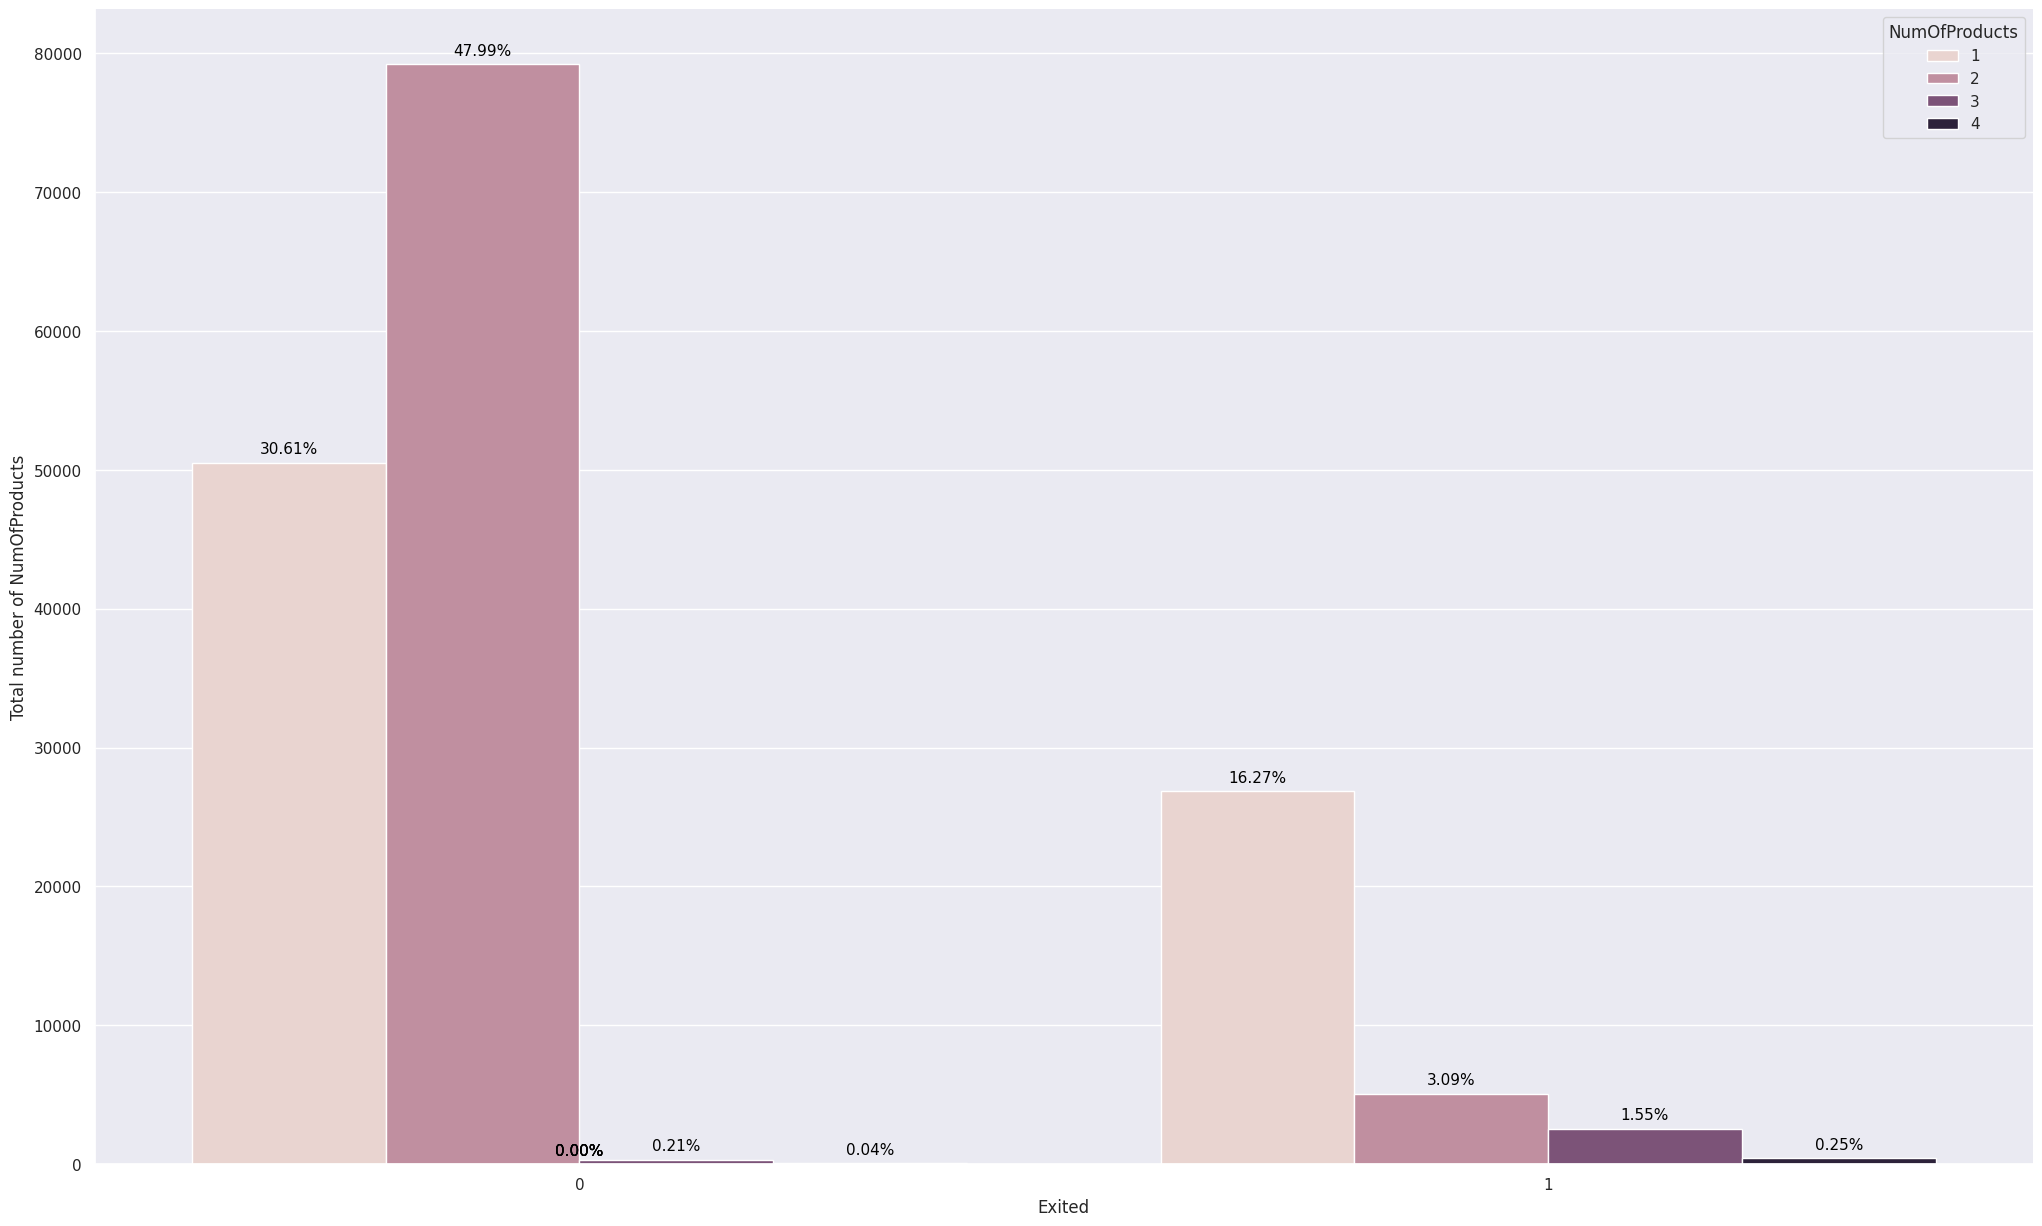

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x='Exited',hue = 'NumOfProducts' ,data = df)
plt.ylabel('Total number of NumOfProducts')
annot_plot(ax, 0.08,1)
plt.show()

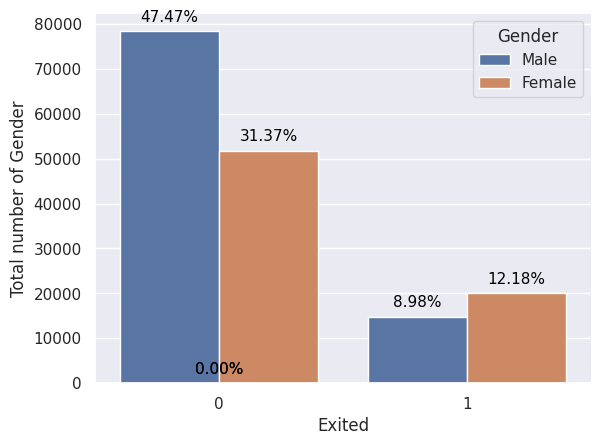

In [ ]:
ax = sns.countplot(data=df, x="Exited", hue="Gender")
plt.ylabel('Total number of Gender')
annot_plot(ax, 0.08,1)
plt.show()

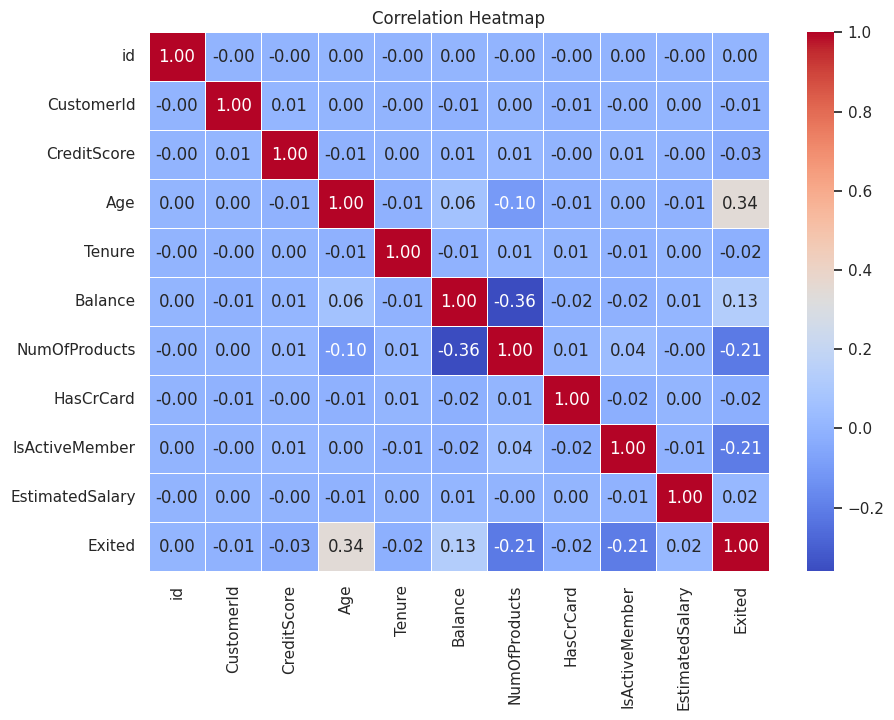

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()